In [23]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Some plotting config
sns.set(
    context="notebook",
    style="darkgrid",
    font="Times New Roman",
    font_scale=1.75,
)
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["mathtext.fontset"] = "cm"

import numpy as np
import scipy as sp
import pandas as pd

import os

os.environ["PYBASEBALL_CACHE"] = "/home/peter/projects/statcast_dashboard/.cache/pybaseball"

import pybaseball as pyb
pyb.cache.enable()

In [24]:
statcast = pyb.statcast(start_dt="2023-01-01", end_dt="2023-12-01")

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates


100%|██████████| 246/246 [00:48<00:00,  5.03it/s]
/home/peter/anaconda3/envs/gcfit/lib/python3.11/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


In [25]:
# drop any columns that are all NaN
statcast = statcast.dropna(axis=1, how="all")

In [26]:
statcast.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'zone', 'des', 'game_type', 'stand', 'p_throws',
       'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls',
       'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b',
       'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x',
       'hc_y', 'fielder_2', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_number', 

In [27]:
# add spray angle
from pybaseball.datahelpers.statcast_utils import add_spray_angle

statcast = add_spray_angle(statcast, adjusted=True)
statcast = add_spray_angle(statcast)

statcast.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'zone', 'des', 'game_type', 'stand', 'p_throws',
       'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls',
       'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b',
       'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x',
       'hc_y', 'fielder_2', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_number', 

In [28]:
# reduce dataframe to just batted balls
bbes = statcast[statcast.bb_type.notnull()]

In [29]:
bbes

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,adj_spray_angle,spray_angle
142,FF,2023-11-01,95.6,-0.66,6.25,"Sborz, Josh",682998,622250,field_out,hit_into_play,...,0,0,5,Standard,Standard,208,-0.002,-0.194,-1.907238,1.907238
193,ST,2023-11-01,85.5,-3.55,4.56,"Sewald, Paul",608369,623149,single,hit_into_play,...,0,5,0,Infield shade,Standard,97,0.0,0.15,28.834813,-28.834813
204,FF,2023-11-01,92.5,-3.6,4.46,"Sewald, Paul",543760,623149,home_run,hit_into_play,...,0,5,0,Standard,Standard,231,-0.026,1.793,-16.013057,-16.013057
213,FF,2023-11-01,91.7,-3.65,4.44,"Sewald, Paul",608671,623149,field_out,hit_into_play,...,0,3,0,Strategic,Standard,241,0.01,-0.351,10.789464,-10.789464
247,FF,2023-11-01,92.9,-3.69,4.48,"Sewald, Paul",641680,623149,single,hit_into_play,...,0,3,0,Standard,Standard,238,-0.087,0.938,-8.642493,8.642493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,None,2023-03-15,<NA>,<NA>,<NA>,"Dunning, Dane",682515,641540,field_error,hit_into_play,...,0,0,0,None,None,<NA>,-0.026,<NA>,-24.484881,-24.484881
653,None,2023-03-15,<NA>,<NA>,<NA>,"Dunning, Dane",687867,641540,field_out,hit_into_play,...,0,0,0,None,None,<NA>,0.023,<NA>,-24.940172,24.940172
1359,None,2023-03-15,<NA>,<NA>,<NA>,"Lyles, Jordan",608671,543475,field_out,hit_into_play,...,0,0,0,None,None,<NA>,-0.021,<NA>,12.381405,-12.381405
1068,None,2023-03-15,<NA>,<NA>,<NA>,"Dunning, Dane",679845,641540,field_out,hit_into_play,...,0,0,0,None,None,<NA>,0.03,<NA>,-9.011836,-9.011836


In [30]:
bbes.woba_value.value_counts()

woba_value
0.0     88982
0.9     30210
1.25     9053
2.0      6354
1.6       785
0.2       422
0.7         2
Name: count, dtype: Int64

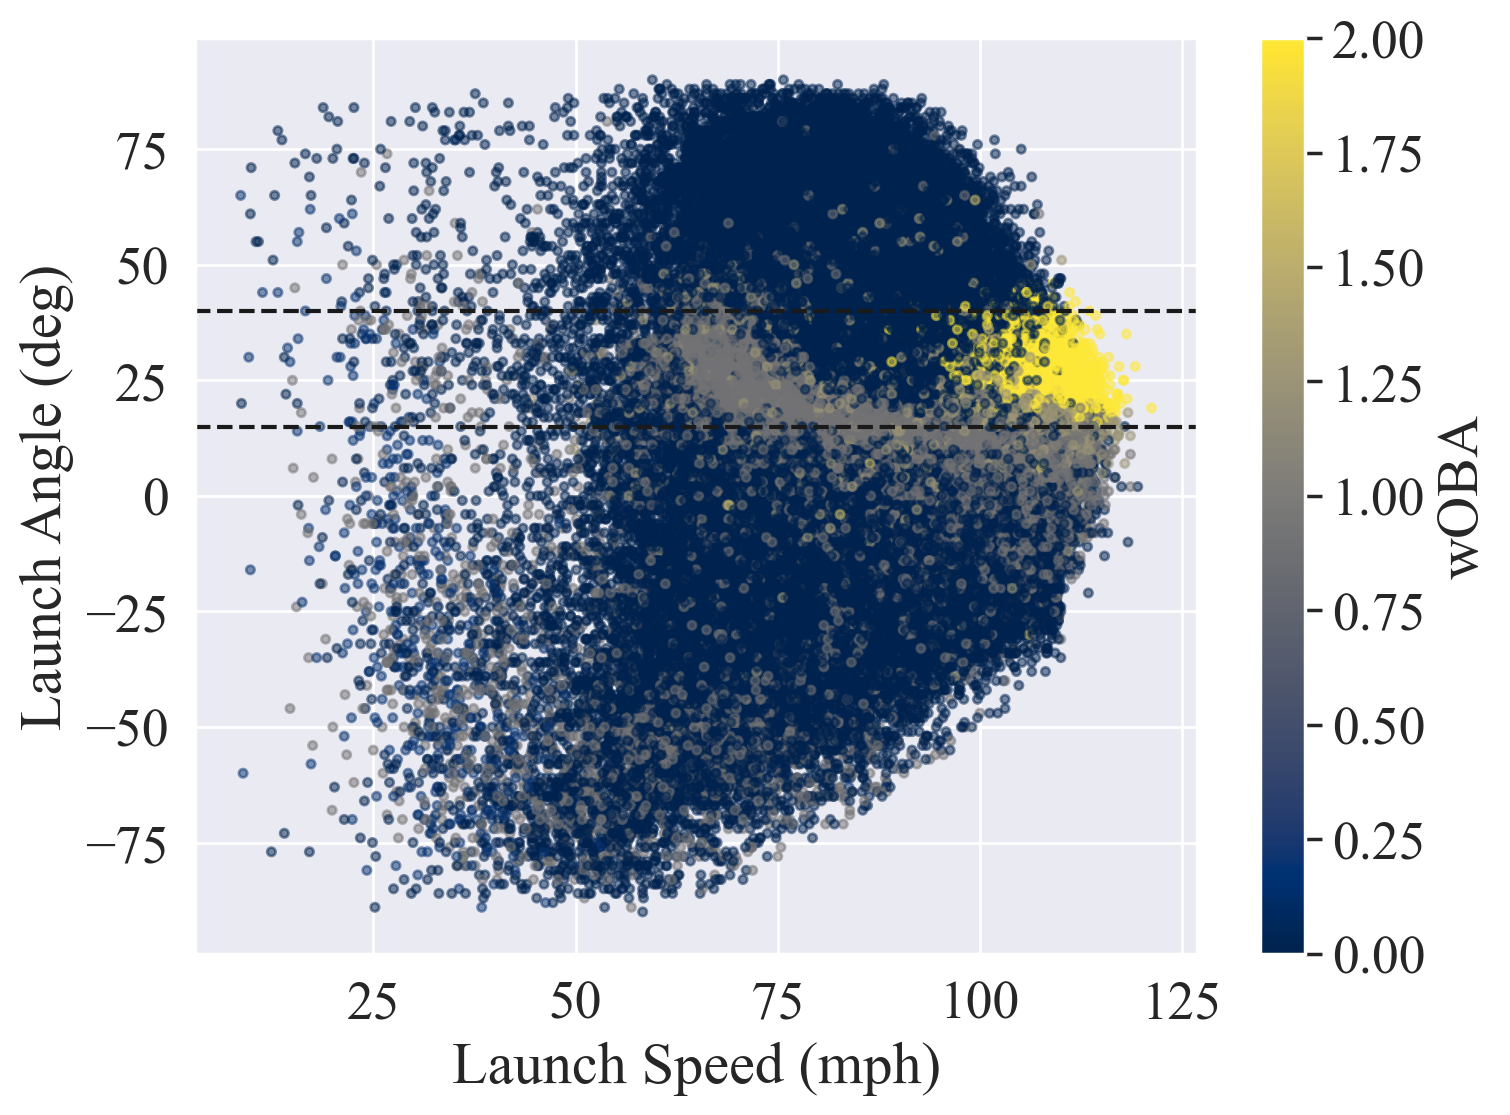

In [31]:
# plot launch speed vs launch angle, colored by woba value

fig, ax = plt.subplots()

ax.scatter(
    bbes.launch_speed,
    bbes.launch_angle,
    c=bbes.woba_value,
    vmin=0,
    vmax=2,
    alpha=0.5,
    marker=".",
    cmap="cividis",
)

ax.set_xlabel("Launch Speed (mph)")
ax.set_ylabel("Launch Angle (deg)")

# colorbar of woba values
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=2), cmap="cividis"),
    ax=ax,
)


# add some horizontal lines to show the optimal launch angle range
ax.axhline(15, color="k", ls="--")
ax.axhline(40, color="k", ls="--")

cbar.set_label("wOBA")
fig.tight_layout()


In [32]:
# lets look at some individual players

# first get all batter ids
batter_ids = bbes.batter.unique()

# lookups for player names
batter_names = pyb.playerid_reverse_lookup(batter_ids, key_type="mlbam")

# add names to dataframe, match batter column in bbes to key_mlbam column in batter_names
# make first letter each name uppercase

batter_names["name_first"] = batter_names.name_first.str.capitalize()
batter_names["name_last"] = batter_names.name_last.str.capitalize()

bbes["batter_name"] = bbes.batter.map(
    dict(zip(batter_names.key_mlbam, batter_names.name_last + ", " + batter_names.name_first))
)

# drop any rows where batter_name is NaN
bbes = bbes.dropna(subset=["batter_name"])

# drop any rows where launch_speed is NaN
bbes = bbes.dropna(subset=["launch_speed"])

# drop any rows where launch_angle is NaN
bbes = bbes.dropna(subset=["launch_angle"])

# drop any rows where woba_value is NaN
bbes = bbes.dropna(subset=["woba_value"])

/tmp/ipykernel_171853/3018891476.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbes["batter_name"] = bbes.batter.map(


In [33]:
# drop any players with less than 100 batted balls
# bbes = bbes.groupby("batter_name").filter(lambda x: len(x) > 100)

In [34]:
bbes

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,adj_spray_angle,spray_angle,batter_name
142,FF,2023-11-01,95.6,-0.66,6.25,"Sborz, Josh",682998,622250,field_out,hit_into_play,...,0,5,Standard,Standard,208,-0.002,-0.194,-1.907238,1.907238,"Carroll, Corbin"
193,ST,2023-11-01,85.5,-3.55,4.56,"Sewald, Paul",608369,623149,single,hit_into_play,...,5,0,Infield shade,Standard,97,0.0,0.15,28.834813,-28.834813,"Seager, Corey"
204,FF,2023-11-01,92.5,-3.6,4.46,"Sewald, Paul",543760,623149,home_run,hit_into_play,...,5,0,Standard,Standard,231,-0.026,1.793,-16.013057,-16.013057,"Semien, Marcus"
213,FF,2023-11-01,91.7,-3.65,4.44,"Sewald, Paul",608671,623149,field_out,hit_into_play,...,3,0,Strategic,Standard,241,0.01,-0.351,10.789464,-10.789464,"Jankowski, Travis"
247,FF,2023-11-01,92.9,-3.69,4.48,"Sewald, Paul",641680,623149,single,hit_into_play,...,3,0,Standard,Standard,238,-0.087,0.938,-8.642493,8.642493,"Heim, Jonah"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,SI,2023-03-15,93.7,-2.47,6.19,"Brubaker, JT",662139,664141,field_out,hit_into_play,...,0,0,None,None,223,-0.016,<NA>,-27.565437,27.565437,"Varsho, Daulton"
182,FF,2023-03-15,95.1,-2.56,5.98,"Gausman, Kevin",656582,592332,single,hit_into_play,...,0,0,Standard,Standard,212,-0.014,<NA>,12.821548,12.821548,"Joe, Connor"
231,SL,2023-03-15,83.3,-2.66,5.89,"Gausman, Kevin",666801,592332,field_out,hit_into_play,...,0,0,None,None,71,0.017,<NA>,-15.180952,15.180952,"Castro, Rodolfo"
365,SI,2023-03-15,92.6,-2.4,6.16,"Brubaker, JT",474832,664141,field_out,hit_into_play,...,0,0,Standard,Standard,223,-0.022,<NA>,10.83262,-10.83262,"Belt, Brandon"


In [35]:
# lets look at some individual players

# get all batted balls for one player
hitter = bbes[bbes.batter_name == "Bichette, Bo"]

In [36]:
hitter

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,adj_spray_angle,spray_angle,batter_name
756,FF,2023-10-04,97.1,-0.75,5.56,"Jax, Griffin",666182,643377,field_out,hit_into_play,...,0,2,Strategic,Standard,210,0.023,-0.107,-12.812994,-12.812994,"Bichette, Bo"
252,ST,2023-10-04,84.5,-0.86,5.47,"Gray, Sonny",666182,543243,single,hit_into_play,...,0,0,Standard,Standard,41,-0.015,0.138,-14.301895,-14.301895,"Bichette, Bo"
768,ST,2023-10-04,85.2,-0.82,5.6,"Gray, Sonny",666182,543243,single,hit_into_play,...,0,0,Standard,Standard,43,-0.02,0.284,-25.613661,-25.613661,"Bichette, Bo"
82,CH,2023-10-03,90.6,-1.76,5.72,"López, Pablo",666182,641154,single,hit_into_play,...,0,3,Standard,Standard,225,-0.027,0.263,0.120102,0.120102,"Bichette, Bo"
252,ST,2023-10-03,85.4,-1.86,5.46,"López, Pablo",666182,641154,single,hit_into_play,...,0,3,Standard,Standard,40,-0.024,0.236,16.841455,16.841455,"Bichette, Bo"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,FC,2023-03-18,86.5,1.41,5.78,"Cortes, Nestor",666182,641482,field_out,hit_into_play,...,3,2,Standard,Standard,187,-0.015,<NA>,25.294681,25.294681,"Bichette, Bo"
2798,FC,2023-03-18,87.9,1.55,5.82,"Cortes, Nestor",666182,641482,grounded_into_double_play,hit_into_play,...,0,2,Standard,Standard,170,-0.077,<NA>,31.109439,31.109439,"Bichette, Bo"
299,SI,2023-03-17,89.3,2.38,5.24,"Plassmeyer, Michael",666182,674681,single,hit_into_play,...,0,8,Standard,Standard,147,0.005,<NA>,12.662465,12.662465,"Bichette, Bo"
3411,FF,2023-03-17,89.9,2.39,5.36,"Plassmeyer, Michael",666182,674681,single,hit_into_play,...,0,6,Standard,Standard,146,0.017,<NA>,11.599944,11.599944,"Bichette, Bo"


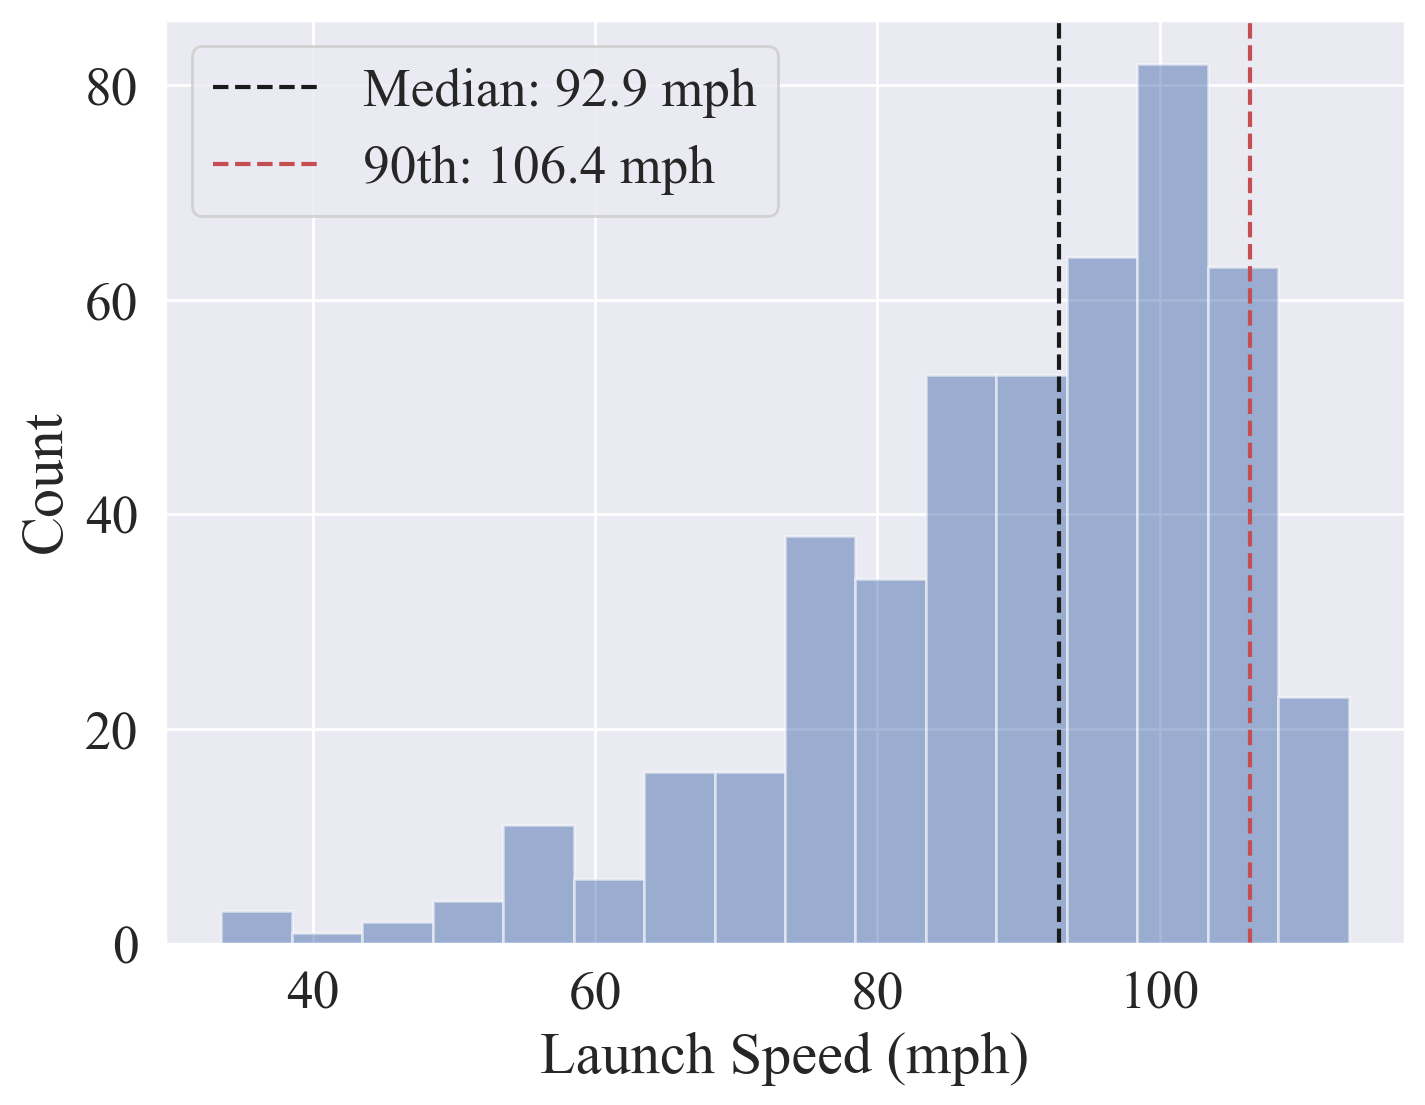

In [37]:
# some basic visualizations of his batted balls

# star with launch speed, plot histogram, add median and 90th percentile lines, legends

fig, ax = plt.subplots()

from astropy.stats import knuth_bin_width

# use knuth binning to get a good bin width
bin_width, bin_edges = knuth_bin_width(hitter.launch_speed, quiet=True, return_bins=True)
ax.hist(hitter.launch_speed, density=False, alpha=0.5, bins=bin_edges)

ax.axvline(
    hitter.launch_speed.median(),
    color="k",
    linestyle="--",
    label=f"Median: {hitter.launch_speed.median():.1f} mph",
)

ax.axvline(
    np.nanpercentile(hitter.launch_speed, 90),
    color="r",
    linestyle="--",
    label=f"90th: {np.nanpercentile(hitter.launch_speed, 90):.1f} mph",
)

ax.set_xlabel("Launch Speed (mph)")
ax.set_ylabel("Count")

ax.legend()

In [38]:
# functions to extract median and 90th percentile launch speed for a player
def get_median_launch_speed(playerid):
    return np.nanmedian(bbes[bbes.batter == playerid].launch_speed)

def get_90th_launch_speed(playerid):
    return np.nanpercentile(bbes[bbes.batter == playerid].launch_speed, 90)

# apply these functions to all players
hitters = bbes.batter.unique()

median_launch_speeds = {hitter: get_median_launch_speed(hitter) for hitter in hitters}
_90th_launch_speeds = {hitter: get_90th_launch_speed(hitter) for hitter in hitters}

# create a dataframe of these values, with player name as index
launch_speeds = pd.DataFrame(
    {"median_launch_speed": median_launch_speeds, "90th_launch_speed": _90th_launch_speeds}
)

launch_speeds

,median_launch_speed,90th_launch_speed
682998,92.10,106.20
608369,95.80,107.90
543760,91.15,102.11
608671,86.95,100.50
641680,92.20,103.75
...,...,...
642082,53.60,53.60
642451,74.00,80.48
605512,76.00,76.00
600474,88.10,88.10


In [39]:
# league average launch speed and 90th percentile launch speed
league_median_launch_speed = np.nanmedian(launch_speeds.median_launch_speed)
league_90th_launch_speed = np.nanpercentile(launch_speeds["90th_launch_speed"], 90)

print(f"League median launch speed: {league_median_launch_speed:.1f} mph")
print(f"League 90th launch speed: {league_90th_launch_speed:.1f} mph")

League median launch speed: 90.9 mph
League 90th launch speed: 107.2 mph


In [40]:
# report also the std of both of these
league_median_launch_speed_std = np.nanstd(launch_speeds.median_launch_speed)
league_90th_launch_speed_std = np.nanstd(launch_speeds["90th_launch_speed"])

print(f"League median launch speed std: {league_median_launch_speed_std:.1f} mph")
print(f"League 90th launch speed std: {league_90th_launch_speed_std:.1f} mph")

League median launch speed std: 5.3 mph
League 90th launch speed std: 6.4 mph


In [41]:
# Ok, all this stuff is working, lets write out the bbe data to a parquet file and move to streamlit

bbes.to_parquet("bbes.parquet")